# Score in a standardised test of attainment

,score
0,124.203105
1,105.535092
2,81.237864
3,112.851935
4,84.505157


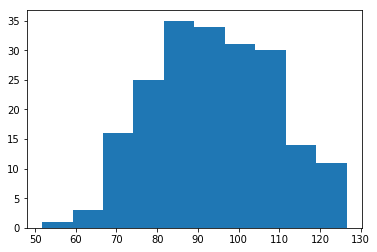

In [6]:
import numpy as np # import numpy package as np
import matplotlib.pyplot as plt # import pyplot package for plotting from matplotlib as plt
import pandas as pd # import pandas package for data manipulation as pd
mu, sigma = 95,15 # mean and standard deviation for a normal distribution
s = np.random.normal(mu, sigma, 200) # # draw 200 samples from normal distribution with mean = 95, standard deviation = 15
# assign to variable s
df = pd.DataFrame(data=s, columns = ["score"]) # create one dimensional dataframe using data in s 
# with column heading "score"; assign to variable df
plt.hist(s) # show histogram of s
df.head() # prinf girst 5 values of df


# Records of attendance

A [report on attendance](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf) in DEIS schools was provide to Túsla, the child and family agency, by the Education Research Centre. The mean percentage of days lost by pupils in DEIS band 1 primary schools in the school year 2015/2016 was 8.1% with a standard deviation of 2.76 (from 174 schools sampled).


In [3]:
s

array([ 77.79966834,  99.88015262, 108.74093306,  97.83479988,
        74.67201877, 108.36124197,  94.98955855,  80.68576619,
       102.6658687 ,  83.3866502 , 114.76083058,  86.68181935,
        86.43909847,  97.99402097,  91.84360297,  98.05636259,
        98.1112587 , 101.3796221 ,  82.50575352, 103.21582795,
        96.00894575, 103.80042693, 101.72377969,  90.36120761,
       108.82508643,  78.1069544 ,  79.48882694,  82.56328298,
        82.40724346,  77.63040008,  98.04239479, 111.1913276 ,
        83.18881212,  77.19654668, 105.06966921, 104.54349566,
       122.14392019,  82.86799445, 107.44843137,  89.51226372,
        88.09097502, 134.84773556, 113.64376909, 103.53430651,
        71.80475985, 134.17912886,  86.92002129,  88.4690986 ,
       103.60786149,  94.02332147,  99.14575505, 117.99752307,
        94.42778883,  70.12971412,  87.04659603,  83.5976788 ,
        83.71731071,  74.25127177,  96.60329036,  97.26201474,
       132.20063586,  91.19016902, 107.07807468,  86.55

# Birth Month

In the UK, chldren must start formal schooling in the Septenber after they turn 4 years old. [Research](https://www.ifs.org.uk/bns/bn122.pdf) by the Institute of Fiscal Studies for the Nuffield Foundation investigated the impact of date of birth on educational outcomes in England. They foind that children born in August scored, on average, over half a standard deviation lower than chldren born in September on standardised tests of academic attainment at age 7.

I wanted to create a column in my datframe that simulated birth month of the students. I used integers 1 - 12 as dummy variables to represent the months January - December

,score,Birth_month
0,124.203105,9
1,105.535092,12
2,81.237864,2
3,112.851935,3
4,84.505157,1


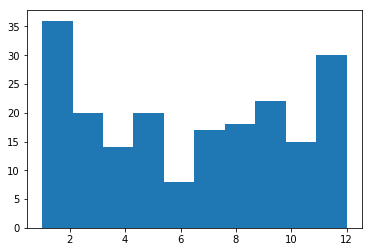

In [9]:
birth_month = np.random.randint(1,13,200)  # draw 200 integers from uniform distribution with range 1 -12(inclusive)
# assign to variable birth_month
df["Birth_month"] = birth_month # add variable "birth_month" to dataframe "df" under column heading "Birth_month"
plt.hist(birth_month) # show histogram of birth_month
df.head() # display first 5 rows of dataframe